In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt


import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report
import sklearn.metrics as sm

import math
from mpl_toolkits.mplot3d import Axes3D


import openpyxl
import os
%matplotlib inline

dftransacties=pd.read_csv("OfferteCustomer.csv",sep=";")
dfcustomers = pd.read_csv("Customer.csv",sep=";")
dfofferte = pd.read_csv("offerte.csv",sep=",")

In [2]:
dftransacties = dftransacties.rename(columns={"customerid": "customerId"})
dfcustomers = dfcustomers.rename(columns={"naamnr": "customerId"})
dfofferte = dfofferte.rename(columns={"Offerid": "OfferId"})

In [4]:
dftransacties.head()

,customerId,OfferId,verkoopaantal
0,83,2,4
1,83,24,2
2,41,17,3
3,41,24,3
4,41,26,2


In [5]:
dfofferte.head()

,OfferId,Campaign,Varietal,MinimumQtyKg,DiscountProcent,Origin,PastPeak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [6]:
dfcustomers.head()

,customerId,namen
0,1,Adams
1,2,Allen
2,3,Anderson
3,4,Bailey
4,5,Baker


In [7]:
offertes = {"offerte": np.arange(1, 33)}
Pivotdf = pd.DataFrame(offertes, columns=pd.Index(["offerte"]))
Pivotdf.head()

,offerte
0,1
1,2
2,3
3,4
4,5


In [8]:
for i in range(0, dfcustomers.iloc[:,1].count()):
    Pivotdf[dfcustomers.iloc[i,1]] = 0
Pivotdf

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for i in range(0, dftransacties.iloc[:,1].count()):
    customerid = dftransacties.iloc[i,0]
    offerid = dftransacties.iloc[i,1] 
    Pivotdf.iloc[offerid - 1, customerid + 1] = 1
Pivotdf    

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
6,7,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
8,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
wb = openpyxl.load_workbook('WineKMC.xlsx')
pivotExcel = wb["Pivot"]
dfExcel = pd.DataFrame(pivotExcel.values)
dfExcel.head

C:\Anaconda3\lib\site-packages\openpyxl\reader\worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<bound method NDFrame.head of                  0              1             2             3             4    \
0               None           None          None          None          None   
1               None           None          None          None          None   
2   Count of Offer #  Column Labels          None          None          None   
3         Row Labels          Adams         Allen      Anderson        Bailey   
4                  1           None          None          None          None   
5                  2           None          None          None          None   
6                  3           None          None          None          None   
7                  4           None          None          None          None   
8                  5           None          None          None          None   
9                  6           None          None          None          None   
10                 7           None          None          None             1  

In [13]:
controleDf = pd.DataFrame(offertes, columns=pd.Index(["offerte"]))
for i in range(0, dfcustomers.iloc[:,1].count()):
    controleDf[dfcustomers.iloc[i,1]] = False

In [14]:
controleDf

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
for i in range(0, 32):
    for j in range(1, 101):
        #note: in de excel dataframe is bij 0 null of nonetype, dus daarbij wordt none bij 0 gekoppeld.
        if((dfExcel.iloc[i+4, j] is None) & (Pivotdf.iloc[i,j] == 0)):
            controleDf.iloc[i, j] = True
        if((dfExcel.iloc[i+4, j] == 0) & (Pivotdf.iloc[i,j] == 0)):
            controleDf.iloc[i, j] = True
        if((dfExcel.iloc[i+4, j] == 1) & (Pivotdf.iloc[i,j] == 1)):
            controleDf.iloc[i, j] = True            

In [16]:
#controleren waar het niet overeenkomt:
controleDf

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,2,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,3,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,4,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,5,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,6,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,7,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,8,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,9,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,10,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [17]:
a = True
for i in range(0, 31):
    for j in range(1, 101):
        #controleren of iets false is
        if(controleDf.iloc[i,j] == False | controleDf.iloc[i,j] is None):
            print("found at index: " + str(i) + " " + str(j))
            #controle variable false maken als wel een false gevonden is
            a = False
if(a):
    print("none found")

none found


In [18]:
#4)	K-means toepassen voor k=4 en k=5. Maak gebruik methodes zodat je voor elke willekeurige k kan uitwerken

In [19]:
#experiment:
experimentdf = pd.DataFrame(columns=['lib', 'qty1', 'qty2'])
for i in range(5):
    experimentdf.loc[i] = [np.random.randint(-1,1) for n in range(3)]

experimentdf

,lib,qty1,qty2
0,-1,-1,-1
1,0,0,0
2,-1,0,0
3,-1,0,-1
4,0,-1,-1


In [20]:
#experiment:

In [23]:
#pivottabel

In [25]:
#experiment
#Clusters = {"Clusters": np.arange(1, K + 1)}
#tempDF = pd.DataFrame(Clusters, columns=pd.Index(["Clusters"]))
#tempDF["Cluster_location"] = 0
#for i in range(0+1, len(pivottabel.columns)):
#    tempDF[pivottabel.columns[i]] = pivottabel.iloc[:,i].sum()
        
#begin tabel is af. 2e tabel voor het bewerken:
#df = pd.DataFrame(Clusters, columns=pd.Index(["Clusters"]))
#df["Cluster_location"] = 0
#for i in range(0+1, len(pivottabel.columns)):
#    df[pivottabel.columns[i]] = pivottabel.iloc[:,i].sum()
        
#counter = 0
#a = True
#Temp = None
#while(a):
#    for i in range(0, df.iloc[:,1].count() - 1):
#        for j in range(2, len(df.columns)):
#            df.iloc[i,j] = math.sqrt(abs(tempDF.iloc[i,j] - df.iloc[i,1]))

#    calc = [[] for _ in range(K)]
#    #add values to closest cluster:
#    for s in range(2, df.iloc[:,1].count()):
#        for a in range(0, K - 1):
#            if(min(df.iloc[:,s]) == df.iloc[a,s]):
#                calc[a].append(df.iloc[a,s])
#                a = K - 1

#    for c in range(0, K - 1):
#        df.iloc[c,1] = (sum(calc[0]) / len(calc[0]))

#    counter = 0

#    if(Temp is not None):
#        for p in range(0, df.iloc[:,1].count()):
#            if(Temp.iloc[p,1] == df.iloc[p,1]):
#                counter = counter + 1
#    if(counter == K):
#        a = False
#    Temp = df      
#return df


In [26]:
#eerst expirement(mislukt):
#def Kmeans(K, pivotDF):
#    Clusters = {"Clusters": np.arange(1, K + 1)}
#    tempDF = pd.DataFrame(Clusters, columns=pd.Index(["Clusters"]))
#    tempDF["Cluster_location"] = 0
#    for i in range(0+1, len(pivottabel.columns)):
#        tempDF[pivottabel.columns[i]] = pivottabel.iloc[:,i].sum()
#        
#    #begin tabel is af. 2e tabel voor het bewerken:
#    df = pd.DataFrame(Clusters, columns=pd.Index(["Clusters"]))
#    df["Cluster_location"] = 0
#    for i in range(0+1, len(pivottabel.columns)):
#        df[pivottabel.columns[i]] = pivottabel.iloc[:,i].sum()
        
#    counter = 0
#    a = True
#    Temp = None
#    while(a):
#        for i in range(0, df.iloc[:,1].count() - 1):
#            for j in range(2, len(df.columns)):
#                df.iloc[i,j] = math.sqrt(abs(tempDF.iloc[i,j] - df.iloc[i,1]))

#        calc = [[] for _ in range(K)]
#        #add values to closest cluster:
#        for s in range(2, df.iloc[:,1].count()):
#            for a in range(0, K - 1):
#                if(min(df.iloc[:,s]) == df.iloc[a,s]):
#                    calc[a].append(df.iloc[a,s])
#                    a = K - 1

#        for c in range(0, K - 1):
#            df.iloc[c,1] = (sum(calc[0]) / len(calc[0]))

#        counter = 0

#        if(Temp is not None):
#            for p in range(0, df.iloc[:,1].count()):
#                if(Temp.iloc[p,1] == df.iloc[p,1]):
#                    counter = counter + 1
#        if(counter == K):
#            a = False
#        Temp = df      
#    return df
    #nu heb ik 2 identieke dataframes, ik verwerk de afstanden op df en behoud de customercoordinaten op tempDF.
    

In [27]:
#experiment(ik denk dat deze geslaagd was):
#K = 5
#pivottabel = Pivotdf
#start = 32
#end = start + K
#pivottabel.iloc[:,1].count()
#for p in range(start, end + 1):
#    pivottabel.loc[p] = 0
    
#oplossing eerdere probleem:
#emptylist = []
#for o in range(0+1, len(pivottabel.columns)):
#    emptylist.append(round(math.sqrt(abs(pivottabel.iloc[0:start-1,o].sum())), 4))

#functie schrijven dat toevoegt aan een lijst de nummber vanaf min(emptylist) tot aan max(emptylist) verdeelt in K stukken.
#for f in range(start, end):
#    currentcluster = f - start + 1
#    Range = max(emptylist) - min(emptylist)
#    s1 = Range / K
#    s2 = Range / (K - 1)
#    pivottabel.iloc[f,0] = min(emptylist) - s1 + (s2 * currentcluster)
    
#pivottabel.iloc[end, 0] = "assigned cluster"

#looper = True
#lastState = []
#for ls in range(0, K - 1):
#    lastState.append(0)

#testcounter = 0
#while(looper):
    #assign distance to clusters
#    testcounter = testcounter + 1
#    for j in range(start, end):
#        for i in range(0+1, len(pivottabel.columns)):
#            pivottabel.iloc[j,i] = round(math.sqrt(abs(pivottabel.iloc[0:start-1,i].sum() - pivottabel.iloc[j,0])), 2)

    #assign kolom to cluster number    
#    for b in range(0+1, len(pivottabel.columns)):
#        checker = True
#        c = 0
#        for a in range(start, end):
#            c = c + 1
#            if((min(pivottabel.iloc[start:end,b]) == pivottabel.iloc[a,b]) & checker):
#                pivottabel.iloc[end, b] = c
#                checker = False
            
    #calculates the nieuwe centroid position            
#    for cl in range(1, K + 1):
#        container = 0
#        length = 0
#        for l in range(0+1, len(pivottabel.columns)):
#            if(pivottabel.iloc[end,l] == cl):
#                length = length + 1
#                container = container + pivottabel.iloc[0:start-1, l].sum()
#            
#        if(length != 0):
#            average = container / length
#            pivottabel.iloc[start-1+cl,0] = average
    
#    currentState = []
#    for cs in range(0, K-1):
#        currentState.append(pivottabel.iloc[start + cs,0])
        
#    if(lastState == currentState):
#        looper = False
#    elif(lastState != currentState):
#        lastState = currentState
    
#for i in range(0, K):  
#    pivottabel.iloc[c,1] = (sum(calc[0]) / len(calc[0]))    
    
    
    
#pivottabel
#ik denk dat dit wel geslaagd is.

In [28]:
#testcounter

In [29]:
def Kmeans(K, pivotDF):
    pd.options.mode.chained_assignment = None
    pivottabel = pivotDF[:]
    start = pivottabel.iloc[:,1].count()
    end = start + K
    #pivottabel.iloc[:,1].count()
    for p in range(start, end + 1):
        pivottabel.loc[p] = 0

    #oplossing eerdere probleem:
    emptylist = []
    for o in range(0+1, len(pivottabel.columns)):
        emptylist.append(round(math.sqrt(abs(pivottabel.iloc[0:start-1,o].sum())), 4))

    #functie schrijven dat toevoegt aan een lijst de nummber vanaf min(emptylist) tot aan max(emptylist) verdeelt in K stukken.
    #for f in range(start, end):
    #    currentcluster = f - start + 1
    #    Range = max(emptylist) - min(emptylist)
    #    s1 = Range / K
    #    s2 = Range / (K - 1)
    #    pivottabel.iloc[f,0] = min(emptylist) - s1 + (s2 * currentcluster)

    pivottabel.iloc[end, 0] = "assigned cluster"


    looper = True
    lastState = []
    for ls in range(0, K - 1):
        lastState.append(0)

    testcounter = 0
    while(looper):
        #assign distance to clusters
        testcounter = testcounter + 1
        for j in range(start, end):
            for i in range(0+1, len(pivottabel.columns)):
                pivottabel.iloc[j,i] = round(math.sqrt(abs(pivottabel.iloc[0:start-1,i].sum() - pivottabel.iloc[j,0])), 2)

        #assign kolom to cluster number    
        for b in range(0+1, len(pivottabel.columns)):
            checker = True
            c = 0
            for a in range(start, end):
                c = c + 1
                if((min(pivottabel.iloc[start:end,b]) == pivottabel.iloc[a,b]) & checker):
                    pivottabel.iloc[end, b] = c
                    checker = False

        #calculates the nieuwe centroid position            
        for cl in range(1, K + 1):
            container = 0
            length = 0
            for l in range(0+1, len(pivottabel.columns)):
                if(pivottabel.iloc[end,l] == cl):
                    length = length + 1
                    container = container + pivottabel.iloc[0:start-1, l].sum()

            if(length != 0):
                average = container / length
                pivottabel.iloc[start-1+cl,0] = average

        currentState = []
        for cs in range(0, K-1):
            currentState.append(pivottabel.iloc[start + cs,0])

        if(lastState == currentState):
            looper = False
        elif(lastState != currentState):
            lastState = currentState
        
        
    return pivottabel

In [30]:
kmeans4 = Kmeans(4, Pivotdf)
kmeans4

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
6,7,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
8,9,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9,10,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [31]:
kmeans5 = Kmeans(5, Pivotdf)
kmeans5

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
6,7,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
8,9,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9,10,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [34]:
#proberen te fixen(ipv 0 als centroid begin random int tussen max en minimum waarde)
def Kmeans2(K, pivotDF):
    pd.options.mode.chained_assignment = None
    pivottabel = pivotDF[:]
    start = pivottabel.iloc[:,1].count()
    end = start + K
    #pivottabel.iloc[:,1].count()
    #highest int
    intList = [0]
    for il in range(0+1, len(pivottabel.columns)):
        if(round(math.sqrt(abs(pivottabel.iloc[0:start-1,il].sum())), 4) > intList[0]):
            intList[0] = round(math.sqrt(abs(pivottabel.iloc[0:start-1,il].sum())), 4)            
    highestInt = intList[0]   
    #centroid assignment
    for p in range(start, end + 1):
        pivottabel.loc[p] = np.random.randint(0,highestInt)
    #oplossing eerdere probleem:
    
    #emptylist = []
    #for o in range(0+1, len(pivottabel.columns)):
    #    emptylist.append(round(math.sqrt(abs(pivottabel.iloc[0:start-1,o].sum())), 4))
    #functie schrijven dat toevoegt aan een lijst de nummber vanaf min(emptylist) tot aan max(emptylist) verdeelt in K stukken.
    #for f in range(start, end):
    #    currentcluster = f - start + 1
    #    Range = max(emptylist) - min(emptylist)
    #    s1 = Range / K
    #    s2 = Range / (K - 1)
    #    pivottabel.iloc[f,0] = min(emptylist) - s1 + (s2 * currentcluster)
    pivottabel.iloc[end, 0] = "assigned cluster"

    looper = True
    lastState = []
    for ls in range(0, K - 1):
        lastState.append(0)

    testcounter = 0
    while(looper):
        #assign distance to clusters
        testcounter = testcounter + 1
        for j in range(start, end):
            for i in range(0+1, len(pivottabel.columns)):
                pivottabel.iloc[j,i] = round(math.sqrt(abs(pivottabel.iloc[0:start-1,i].sum() - pivottabel.iloc[j,0]) ** 2), 2)

        #assign kolom to cluster number    
        for b in range(0+1, len(pivottabel.columns)):
            checker = True
            c = 0
            for a in range(start, end):
                c = c + 1
                if((min(pivottabel.iloc[start:end,b]) == pivottabel.iloc[a,b]) & checker):
                    pivottabel.iloc[end, b] = c
                    checker = False

        #calculates the nieuwe centroid position            
        for cl in range(1, K + 1):
            container = 0
            length = 0
            for l in range(0+1, len(pivottabel.columns)):
                if(pivottabel.iloc[end,l] == cl):
                    length = length + 1
                    container = container + pivottabel.iloc[0:start-1, l].sum()

            if(length != 0):
                average = container / length
                pivottabel.iloc[start-1+cl,0] = average

        currentState = []
        for cs in range(0, K-1):
            currentState.append(pivottabel.iloc[start + cs,0])

        if(lastState == currentState):
            looper = False
        elif(lastState != currentState):
            lastState = currentState
        
        
    return pivottabel

In [35]:
Test2K4 = Kmeans2(4, Pivotdf)
Test2K4

,offerte,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
6,7,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
8,9,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9,10,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [36]:
#zoals boven te zien mislukt.

In [37]:
#https://www.youtube.com/watch?v=1XqG0kaJVHY
#https://www.youtube.com/watch?v=4b5d3muPQmA
#naar tutorials zoeken voor library.


In [38]:
#een merged df maken
merge1 = pd.merge(dftransacties, dfcustomers, on='customerId')
merge1.head()

,customerId,OfferId,verkoopaantal,namen
0,83,2,4,Scott
1,83,24,2,Scott
2,41,17,3,Jenkins
3,41,24,3,Jenkins
4,41,26,2,Jenkins


In [39]:
mergeddf = pd.merge(merge1, dfofferte, on='OfferId')
mergeddf.head()

,customerId,OfferId,verkoopaantal,namen,Campaign,Varietal,MinimumQtyKg,DiscountProcent,Origin,PastPeak
0,83,2,4,Scott,January,Pinot Noir,72,17,France,False
1,76,2,2,Robinson,January,Pinot Noir,72,17,France,False
2,49,2,4,Lopez,January,Pinot Noir,72,17,France,False
3,38,2,3,Hughes,January,Pinot Noir,72,17,France,False
4,11,2,1,Butler,January,Pinot Noir,72,17,France,False


In [40]:
#de functie zou dan per customer wat verwachten, dus de pivottabel moet de rows en kolomen omgedraaid hebben:
customers = {"Customers": dfcustomers.namen}
df = pd.DataFrame(customers, columns=pd.Index(["Customers"]))
df['x'] = 0
df['y'] = 0
for i in range(0, df.iloc[:,1].count()):
    df.iloc[i,1] = Pivotdf.iloc[:,i+1].sum()
    df.iloc[i,2] = Pivotdf.iloc[:,i+1].sum()
df.head()
 

,Customers,x,y
0,Adams,3,3
1,Allen,2,2
2,Anderson,2,2
3,Bailey,2,2
4,Baker,4,4


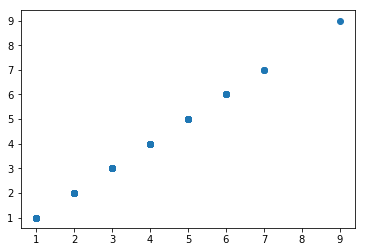

In [41]:
plt.scatter(df['x'], df['y'])
#Note, de deals zijn tussen 1 en 9 dus op de nr 1 zijn er veel meer deals.
#op de scatterplot is het zichbaar als een lijn.

In [42]:
#instantie van de class maken:
K4 = KMeans(n_clusters = 4)
#de instantie gebruiken om de dataframe te bewerken:
y_predicted = K4.fit_predict(df[['x', 'y']])
y_predicted
#Note, clsuters zijn 4, beginnen bij 0 en eindigen op 3, bvb array[3,0]
#houdti n eerste item zit in 4e cluster en 2e item zit in 1e cluster.

array([3, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 1, 1, 0, 0, 1, 3, 0, 1,
       1, 2, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 3, 0, 0, 0, 1, 3, 1, 0,
       0, 0, 3, 3, 0, 3, 3, 2, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 3, 0, 2,
       0, 1, 0, 1, 1, 1, 0, 3, 1, 0, 0, 2])

In [43]:
df['cluster'] = y_predicted
df.head()

,Customers,x,y,cluster
0,Adams,3,3,3
1,Allen,2,2,1
2,Anderson,2,2,1
3,Bailey,2,2,1
4,Baker,4,4,0


In [44]:
#centroids locatie uitprinten:
K4.cluster_centers_[:,0]

array([4.25806452, 1.78571429, 6.6       , 3.        ])

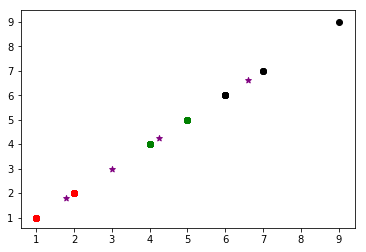

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==4]
plt.scatter(df1.x, df1.y, color='green')
plt.scatter(df2.x, df2.y, color='red')
plt.scatter(df3.x, df3.y, color='black')
plt.scatter(df4.x, df4.y, color='blue')
plt.scatter(K4.cluster_centers_[:,0],K4.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

In [47]:
df.head()

,Customers,x,y,cluster
0,Adams,3,3,3
1,Allen,2,2,1
2,Anderson,2,2,1
3,Bailey,2,2,1
4,Baker,4,4,0


In [48]:
#experiment begint:
sdf = df[:]
K = 4
for i in range(1, K+1):
    #distance kolomen maken gebaseerd op de hoeveelheid clusters
    sdf['Distance' + str(i)] = 0  #np.iinfo(np.int32).max
sdf['closest'] = 0
sdf['second_closest'] = 0
sdf['my_cluster'] = 0
sdf['neighbor_cluster'] = 0
sdf['silhouette_values'] = 0
sdf['silhouette_total'] = None
sdf.head(7)

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,3,0,0,0,0,0,0,0,0,0,None
1,Allen,2,2,1,0,0,0,0,0,0,0,0,0,None
2,Anderson,2,2,1,0,0,0,0,0,0,0,0,0,None
3,Bailey,2,2,1,0,0,0,0,0,0,0,0,0,None
4,Baker,4,4,0,0,0,0,0,0,0,0,0,0,None
5,Barnes,4,4,0,0,0,0,0,0,0,0,0,0,None
6,Bell,4,4,0,0,0,0,0,0,0,0,0,0,None


In [49]:
for a in range(1, K+1):
        #cluster hoeveelheid
        for b in range(0, sdf.iloc[:,1].count()):
            #voor elke row, ter plaatsen van distance
            for c in range(0, sdf.iloc[:,1].count()):
                #per row, ter controleren van elke andere row
                #if(sdf.loc[b, 'cluster'] == a - 1):
                    #als de huidige te controleren row behoort tot de distance cluster(bvb bij distance 1 moet het cluster 0 zijn)
                    if(
                        (
                            #als de nieuwe distance kleiner is dan de huidige of als de huidige 0 is(want dat is initiaal) dan vervangen.
                            math.sqrt(
                                (
                                    sdf.loc[b, 'x'] 
                                    - 
                                    sdf.loc[c, 'x']
                                )**2
                            )
                            < 
                            sdf.loc[b,'Distance' + str(a)]
                        ) 
                        or 
                        (sdf.loc[b, 'Distance' + str(a)] == 0)
                    ):
                        if(abs(sdf.loc[b, 'x'] - sdf.loc[c, 'x']) != 0):
                        #als de distance kleiner is dan de geschreven distance of als de geschreven distance 0 is
                            sdf.loc[b, 'Distance' + str(a)] = abs(sdf.loc[b, 'x'] - sdf.loc[c, 'x'])                        
                        #de nieuwere kleinere distance schrijven.
sdf.head()
#dat is raar alles is 1

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,3,1,1,1,1,0,0,0,0,0,None
1,Allen,2,2,1,1,1,1,1,0,0,0,0,0,None
2,Anderson,2,2,1,1,1,1,1,0,0,0,0,0,None
3,Bailey,2,2,1,1,1,1,1,0,0,0,0,0,None
4,Baker,4,4,0,1,1,1,1,0,0,0,0,0,None


In [50]:
for d in range(1, K+1):
        #cluster hoeveelheid, dit is nodig omdat we k-distances gaan vergelijken.
        for r in range(0, sdf.iloc[:,1].count()):
            #voor elke row gaan we de waarde schrijven
            #values opslaan en sorteren
            L = sdf.loc[r, 'Distance' + str(1): 'Distance' + str(K)].sort_values()
            sdf.loc[r, 'closest'] = L[0]
            sdf.loc[r, 'second_closest'] = L[1]
            
            if(sdf.loc[r, 'Distance' + str(sdf.loc[r,'cluster'] + 1)] == L[0]):
                #als de distance van de huidige cluster gelijk is aan de kleinste waarde:
                sdf.loc[r, 'my_cluster'] = L[0]
                sdf.loc[r, 'neighbor_cluster'] = L[1]
            else:
                sdf.loc[r, 'my_cluster'] = L[1]
                sdf.loc[r, 'neighbor_cluster'] = L[0]
            #nu we de waarden hebben kunnen we terwijl we toch bezig zijn de bij behorende silhouette waarde uitrekenen:
            #daarbij geldt:
            #4e - 3e / grootste(max) van 4e of 3e = silt
            #dus:
            sdf.loc[r, 'silhouette_values'] = (sdf.loc[r, 'neighbor_cluster'] - sdf.loc[r, 'my_cluster']) / max(sdf.loc[r, 'my_cluster':'neighbor_cluster'])
sdf.tail()

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
95,Williams,3,3,3,1,1,1,1,1,1,1,1,0.0,None
96,Wilson,2,2,1,1,1,1,1,1,1,1,1,0.0,None
97,Wood,4,4,0,1,1,1,1,1,1,1,1,0.0,None
98,Wright,4,4,0,1,1,1,1,1,1,1,1,0.0,None
99,Young,6,6,2,1,1,1,1,1,1,1,1,0.0,None


In [51]:
silhouettevalue = 0
for s in range(0, sdf.iloc[:,1].count()):
    silhouettevalue = silhouettevalue + sdf.loc[s, 'silhouette_values']
sdf.loc[0, 'silhouette_total'] = silhouettevalue
sdf.head()

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,3,1,1,1,1,1,1,1,1,0.0,0
1,Allen,2,2,1,1,1,1,1,1,1,1,1,0.0,None
2,Anderson,2,2,1,1,1,1,1,1,1,1,1,0.0,None
3,Bailey,2,2,1,1,1,1,1,1,1,1,1,0.0,None
4,Baker,4,4,0,1,1,1,1,1,1,1,1,0.0,None


In [52]:
def Silhouette(DF, k):
    sdf = DF[:]
    for i in range(1, k+1):
        #distance kolomen maken gebaseerd op de hoeveelheid clusters
        sdf['Distance' + str(i)] = 0  #np.iinfo(np.int32).max
    sdf['closest'] = 0
    sdf['second_closest'] = 0
    sdf['my_cluster'] = 0
    sdf['neighbor_cluster'] = 0
    sdf['silhouette_values'] = 0
    sdf['silhouette_total'] = None
    #nu heb ik een de df met de juiste kolomen, nu kolomen vullen.
    #Ik ben van plan dit te delen dus ik schrijf daarvoor comments.
    for a in range(1, k+1):
        #cluster hoeveelheid
        for b in range(0, sdf.iloc[:,1].count()):
            #voor elke row, ter plaatsen van distance
            for c in range(0, sdf.iloc[:,1].count()):
                #per row, ter controleren van elke andere row
                #if(sdf.loc[b, 'cluster'] == a - 1):
                    #als de huidige te controleren row behoort tot de distance cluster(bvb bij distance 1 moet het cluster 0 zijn)
                    if(
                        (
                            #pivottabel.iloc[j,i] = round(math.sqrt(abs(pivottabel.iloc[0:start-1,i].sum() - pivottabel.iloc[j,0]) ** 2), 2)
                            abs(sdf.loc[b, 'x'] - sdf.loc[c, 'x']) < sdf.loc[b,'Distance' + str(a)]
                        ) 
                        or 
                        (sdf.loc[b, 'Distance' + str(a)] == 0)
                    ):
                        if(abs(sdf.loc[b, 'x'] - sdf.loc[c, 'x']) != 0):
                        #als de distance kleiner is dan de geschreven distance of als de geschreven distance 0 is
                            sdf.loc[b, 'Distance' + str(a)] = abs(sdf.loc[b, 'x'] - sdf.loc[c, 'x'])                        
                        #de nieuwere kleinere distance schrijven.
    
    #nu heb ik alle distances ingevuld, nu de dichtbijzijnden bepalen:
    for d in range(1, k+1):
        #cluster hoeveelheid, dit is nodig omdat we k-distances gaan vergelijken.
        for r in range(0, sdf.iloc[:,1].count()):
            #voor elke row gaan we de waarde schrijven
            #values opslaan en sorteren
            L = sdf.loc[r, 'Distance' + str(1): 'Distance' + str(k)].sort_values()
            sdf.loc[r, 'closest'] = L[0]
            sdf.loc[r, 'second_closest'] = L[1]
            
            if(sdf.loc[r, 'Distance' + str(sdf.loc[r,'cluster'] + 1)] == L[0]):
                #als de distance van de huidige cluster gelijk is aan de kleinste waarde:
                sdf.loc[r, 'my_cluster'] = L[0]
                sdf.loc[r, 'neighbor_cluster'] = L[1]
            else:
                sdf.loc[r, 'my_cluster'] = L[1]
                sdf.loc[r, 'neighbor_cluster'] = L[0]
            #nu we de waarden hebben kunnen we terwijl we toch bezig zijn de bij behorende silhouette waarde uitrekenen:
            #daarbij geldt:
            #4e - 3e / grootste(max) van 4e of 3e = silt
            #dus:
            sdf.loc[r, 'silhouette_values'] = (sdf.loc[r, 'neighbor_cluster'] - sdf.loc[r, 'my_cluster']) / max(sdf.loc[r, 'my_cluster':'neighbor_cluster'])
    silhouettevalue = 0
    for s in range(0, sdf.iloc[:,1].count()):
        silhouettevalue = silhouettevalue + sdf.loc[s, 'silhouette_values']
    sdf.loc[0, 'silhouette_total'] = silhouettevalue      
    
    return sdf

In [53]:
#TESTEN!
testSilthouetteValue = Silhouette(df, 4)
testSilthouetteValue.head()
#
#dit resultaat is raar, ik test het met k = 3 en k = 5

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,3,1,1,1,1,1,1,1,1,0.0,0
1,Allen,2,2,1,1,1,1,1,1,1,1,1,0.0,None
2,Anderson,2,2,1,1,1,1,1,1,1,1,1,0.0,None
3,Bailey,2,2,1,1,1,1,1,1,1,1,1,0.0,None
4,Baker,4,4,0,1,1,1,1,1,1,1,1,0.0,None


In [54]:
#k = 3
customers = {"Customers": dfcustomers.namen}
df3 = pd.DataFrame(customers, columns=pd.Index(["Customers"]))
df3['x'] = 0
df3['y'] = 0
for i in range(0, df3.iloc[:,1].count()):
    df3.iloc[i,1] = Pivotdf.iloc[:,i+1].sum()
    df3.iloc[i,2] = Pivotdf.iloc[:,i+1].sum()
K3 = KMeans(n_clusters = 3)
#de instantie gebruiken om de dataframe te bewerken:
y_predicted = K3.fit_predict(df3[['x', 'y']])
y_predicted
df3['cluster'] = y_predicted
max(df3['cluster'])

2

In [55]:
#TESTEN k=3
TSV3 = Silhouette(df3, 3)
TSV3.head()

,Customers,x,y,cluster,Distance1,Distance2,Distance3,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,0,1,1,1,1,1,1,1,0.0,0
1,Allen,2,2,2,1,1,1,1,1,1,1,0.0,None
2,Anderson,2,2,2,1,1,1,1,1,1,1,0.0,None
3,Bailey,2,2,2,1,1,1,1,1,1,1,0.0,None
4,Baker,4,4,0,1,1,1,1,1,1,1,0.0,None


In [56]:
#k = 5
customers = {"Customers": dfcustomers.namen}
df5 = pd.DataFrame(customers, columns=pd.Index(["Customers"]))
df5['x'] = 0
df5['y'] = 0
for i in range(0, df5.iloc[:,1].count()):
    df5.iloc[i,1] = Pivotdf.iloc[:,i+1].sum()
    df5.iloc[i,2] = Pivotdf.iloc[:,i+1].sum()
K5 = KMeans(n_clusters = 5)
#de instantie gebruiken om de dataframe te bewerken:
y_predicted = K5.fit_predict(df3[['x', 'y']])
y_predicted
df5['cluster'] = y_predicted
df5.head()

,Customers,x,y,cluster
0,Adams,3,3,4
1,Allen,2,2,0
2,Anderson,2,2,0
3,Bailey,2,2,0
4,Baker,4,4,3


In [57]:
#TESTEN k=5
TSV5 = Silhouette(df5, 5)
TSV5.head()
#blijkbaar werkt deze functie niet.

,Customers,x,y,cluster,Distance1,Distance2,Distance3,Distance4,Distance5,closest,second_closest,my_cluster,neighbor_cluster,silhouette_values,silhouette_total
0,Adams,3,3,4,1,1,1,1,1,1,1,1,1,0.0,0
1,Allen,2,2,0,1,1,1,1,1,1,1,1,1,0.0,None
2,Anderson,2,2,0,1,1,1,1,1,1,1,1,1,0.0,None
3,Bailey,2,2,0,1,1,1,1,1,1,1,1,1,0.0,None
4,Baker,4,4,3,1,1,1,1,1,1,1,1,1,0.0,None


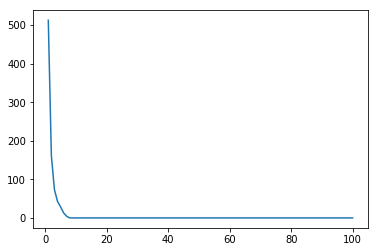

In [59]:

n = df.iloc[:,0].count()
k_rng = range(1,n+1)#van 1 t/m n K's in een "ellbow graf/plot"(dit is een wijze van aantonen van k,
#waarbij de ellbow de juiste getal is, dus het daalt dan opeens gaat het naar rechts, de locatie waar het afgaat is 
#de ellbow) aantonen.

sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)#dit is de SSE door de functie
plt.plot(k_rng, sse)
#het is zichtbaar dat 3 de beste clustersize is, DUS MIJN ZELFGESCHREVEN FUCNTIE
#ASSIGNT DE JUISTE CLUSTER AUTOMATISCH BLIJKBAAR.
#dus dan klopt het blijktbaar, maar het geeft minder vrijheid.

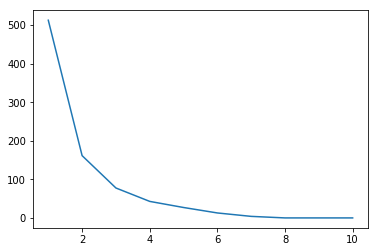

In [60]:
#Dit is nogmaals te merken als ik de iteratie kleiner maak:
n = 10
k_rng2 = range(1,n+1)
sse2 = []
for k2 in k_rng2:
    km2 = KMeans(n_clusters=k2)
    km2.fit(df[['x','y']])
    sse2.append(km2.inertia_)
plt.plot(k_rng2, sse2)
#heel duidelijk 3 te zien.